# AST 7939 Week 3

## hyperparameter optimization, cross validation, evaluation metric

### Let's load the iris data and run cross validation.

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate

iris = load_iris()
model = DecisionTreeClassifier(max_depth=4, random_state=0)

scores = cross_val_score(model, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Mean cross-validation scores: {:.3f}".format(scores.mean()))
print("Standard deviation cross-validation scores: {:.3f}".format(scores.std()))

Cross-validation scores: [0.96666667 0.96666667 0.9        1.         1.        ]
Mean cross-validation scores: 0.967
Standard deviation cross-validation scores: 0.037


### Let's split the data.

In [4]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

# If you want to reproduce the result, make sure you use the same random_state value.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### We can use for loops for hyperparameter optimization.

In [5]:
import numpy as np

max_depth = np.arange(10)+1
criterion = ['gini','entropy']

best_score = 0

for i in max_depth:
    for j in criterion:
        model = DecisionTreeClassifier(max_depth=i, criterion=j, random_state=0)
        score = cross_val_score(model, X_train, y_train, cv=5)
        score = np.mean(score)
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth': i, 'criterion': j}
    
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.96
Best parameters: {'max_depth': 3, 'criterion': 'gini'}


### But we can take advantage of built-in modules.

In [6]:
from sklearn.model_selection import GridSearchCV

# Grid of parameters you want to vary in a dictionary 
param_grid = {'max_depth': np.arange(10)+1,
              'criterion': ['gini','entropy']}

# Make an object of the GridSearchCV class, no training done yet
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, 
                           return_train_score=True, verbose=3)

# This is where the training happens (.fit() = training)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END criterion=gini, max_depth=1;, score=(train=0.697, test=0.696) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1;, score=(train=0.697, test=0.696) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1;, score=(train=0.700, test=0.682) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1;, score=(train=0.700, test=0.682) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1;, score=(train=0.689, test=0.727) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2;, score=(train=0.966, test=0.957) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2;, score=(train=0.966, test=0.913) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2;, score=(train=0.956, test=1.000) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2;, score=(train=0.978, test=0.909) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2;, score=(train=0.956, test=0.955) total time=   0.0

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             return_train_score=True, verbose=3)

In [5]:
grid_search.cv_results_

{'mean_fit_time': array([0.00104928, 0.00071573, 0.00032821, 0.00032415, 0.00031815,
        0.00031762, 0.00031443, 0.00031633, 0.00032163, 0.00031476,
        0.00030432, 0.00033822, 0.00033188, 0.00033283, 0.00035648,
        0.0003334 , 0.00032439, 0.00032668, 0.00032458, 0.00032535]),
 'std_fit_time': array([3.16005277e-04, 2.56583368e-04, 7.06556184e-06, 2.78286676e-06,
        3.01050074e-06, 3.50856250e-06, 6.91561848e-06, 2.09699950e-06,
        3.15217855e-06, 7.92095272e-06, 1.62124634e-06, 3.29503102e-05,
        1.27744310e-05, 9.73962512e-06, 3.47651243e-05, 1.50030278e-05,
        7.64814695e-06, 3.58548569e-06, 8.33660828e-06, 6.45687518e-06]),
 'mean_score_time': array([3.19004059e-04, 2.17533112e-04, 1.05762482e-04, 9.50336456e-05,
        9.28401947e-05, 9.29355621e-05, 9.20772552e-05, 9.15050507e-05,
        9.23156738e-05, 9.22203064e-05, 9.39846039e-05, 1.08051300e-04,
        9.61780548e-05, 9.40322876e-05, 1.01566315e-04, 9.30786133e-05,
        9.50336456e-05, 

In [7]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'criterion': 'gini', 'max_depth': 3}
Best model: DecisionTreeClassifier(max_depth=3, random_state=0)
Test score: 0.97


In [7]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [25]:
help(grid_search)

Help on GridSearchCV in module sklearn.model_selection._search object:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either es

### Let's make a heatmap.

In [9]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 2.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582621 sha256=17cec495378db16c73d9ba1ffb204e8851d63c0ee6617c25042e9b1702232583
  Stored in directory: /Users/lorrainen/Library/Caches/pip/wheels/df/30/8a/1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


In [9]:
results.mean_test_score

0     0.696443
1     0.946640
2     0.964427
3     0.964032
4     0.964032
5     0.964032
6     0.964032
7     0.964032
8     0.964032
9     0.964032
10    0.696443
11    0.946640
12    0.964427
13    0.964032
14    0.964032
15    0.964032
16    0.964032
17    0.964032
18    0.964032
19    0.964032
Name: mean_test_score, dtype: float64

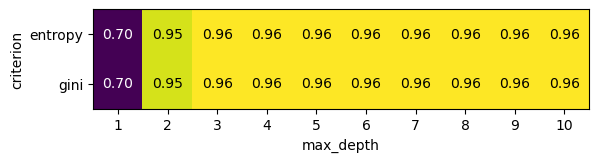

In [8]:
import pandas as pd
import mglearn #can use seaborn instead
# If you don't have mglearn install, pip install mglearn.

results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(2,10)

mglearn.tools.heatmap(scores, xlabel='max_depth', xticklabels=param_grid['max_depth'],
                     ylabel='criterion', yticklabels=param_grid['criterion'], cmap='viridis')

### What if we need feature scaling?

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# We use a "pipeline"
# Sequentially apply a list of transforms and a final estimator. 
# Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. 
# The final estimator only needs to implement fit.
# See https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

pipe = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {'knn__n_neighbors': np.arange(10)+1,
              'knn__weights': ['uniform','distance']}

grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, verbose=3)
# Training!
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.957) total time=   0.0s
[CV 2/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.913) total time=   0.0s
[CV 3/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.955) total time=   0.0s
[CV 4/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.909) total time=   0.0s
[CV 5/5] END knn__n_neighbors=1, knn__weights=uniform;, score=(train=1.000, test=0.955) total time=   0.0s
[CV 1/5] END knn__n_neighbors=1, knn__weights=distance;, score=(train=1.000, test=0.957) total time=   0.0s
[CV 2/5] END knn__n_neighbors=1, knn__weights=distance;, score=(train=1.000, test=0.913) total time=   0.0s
[CV 3/5] END knn__n_neighbors=1, knn__weights=distance;, score=(train=1.000, test=0.955) total time=   0.0s
[CV 4/5] END knn__n_neighbors=1, knn__weights=distance;, score=(train=1.000, te

[CV 2/5] END knn__n_neighbors=10, knn__weights=uniform;, score=(train=0.966, test=0.913) total time=   0.0s
[CV 3/5] END knn__n_neighbors=10, knn__weights=uniform;, score=(train=0.956, test=1.000) total time=   0.0s
[CV 4/5] END knn__n_neighbors=10, knn__weights=uniform;, score=(train=0.978, test=0.909) total time=   0.0s
[CV 5/5] END knn__n_neighbors=10, knn__weights=uniform;, score=(train=0.944, test=0.955) total time=   0.0s
[CV 1/5] END knn__n_neighbors=10, knn__weights=distance;, score=(train=1.000, test=0.957) total time=   0.0s
[CV 2/5] END knn__n_neighbors=10, knn__weights=distance;, score=(train=1.000, test=0.957) total time=   0.0s
[CV 3/5] END knn__n_neighbors=10, knn__weights=distance;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END knn__n_neighbors=10, knn__weights=distance;, score=(train=1.000, test=0.909) total time=   0.0s
[CV 5/5] END knn__n_neighbors=10, knn__weights=distance;, score=(train=1.000, test=0.955) total time=   0.0s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'knn__weights': ['uniform', 'distance']},
             return_train_score=True, verbose=3)

In [29]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Best model: Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(weights='distance'))])
Test score: 0.97


### Let's load the SDSS data we used for homework #1 and test parallelization.

In [30]:
import pandas as pd 
import numpy as np

data = pd.read_csv('SDSS.csv')
data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237655107828973746,138.937318,49.779249,17.32152,16.28594,15.88471,15.66384,15.46604,2243,301,3,152,862475375345690624,GALAXY,0.028514,766,52247,131
1,1237678584114511952,31.594644,22.451246,18.13019,17.47997,16.97868,16.75768,16.83714,7709,301,3,65,2303710287351539712,QSO,1.694959,2046,53327,433
2,1237680298881122360,333.991221,19.977552,18.94798,18.80473,18.75522,18.72968,18.66552,8108,301,5,79,8532228490187264000,QSO,2.046520,7578,56956,578
3,1237650761319514319,186.201096,-2.808180,19.22969,18.04638,17.37830,16.99285,16.76479,1231,301,3,113,376103378880587776,GALAXY,0.000000,334,51993,192
4,1237648722280317126,124.814240,0.651496,18.76061,17.28682,16.74055,16.55152,16.45902,756,301,5,60,2316149895234349056,STAR,0.000196,2057,53816,632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1237673758185554973,100.889697,29.106283,19.17071,18.21106,17.80099,17.63203,17.53079,6585,301,6,121,3013004977846118400,STAR,0.000160,2676,54179,352
149996,1237671262268752282,124.964450,9.635759,19.38253,17.49415,16.55436,16.13420,15.80408,6004,301,5,61,2728125362876737536,GALAXY,0.110984,2423,54149,254
149997,1237673756573762584,98.821075,26.946457,18.90948,17.73591,17.31252,17.16612,17.07103,6585,301,3,103,3035579600630474752,STAR,0.000097,2696,54167,558
149998,1237678877782966354,320.766012,9.993010,17.63177,16.10855,15.35884,15.21912,15.11279,7777,301,6,66,821986413082863616,STAR,-0.000218,730,52466,289


In [31]:
# X for an array containing features (i.e., colors)
X = np.array([data['u'], data['g'], data['r'], data['i'], data['z']]).T

# y for an array containing labels (i.e., galaxies or quasars)
y = np.expand_dims(data['class'], axis=1)

#If you want to reproduce the result, make sure you use the same random_state value.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



### Hyperparameter optimization with 1 CPU core

In [32]:
from sklearn.model_selection import GridSearchCV
import time

tstart = time.time()

param_grid = {'max_depth': np.arange(10)+1,
              'criterion': ['gini','entropy']}

# By defaults, sklearn's GridSearchCV will use stratified k-fold for classification problems.
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True, 
                           verbose=3)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Elapsed time: {:.3f}".format(time.time()-tstart) + " seconds")



Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END criterion=gini, max_depth=1;, score=(train=0.600, test=0.600) total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1;, score=(train=0.600, test=0.600) total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1;, score=(train=0.600, test=0.600) total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1;, score=(train=0.600, test=0.597) total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1;, score=(train=0.599, test=0.601) total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2;, score=(train=0.664, test=0.667) total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2;, score=(train=0.665, test=0.664) total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2;, score=(train=0.665, test=0.664) total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2;, score=(train=0.665, test=0.662) total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2;, score=(train=0.665, test=0.664) total time=   0.2

[CV 2/5] END criterion=entropy, max_depth=8;, score=(train=0.862, test=0.851) total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=8;, score=(train=0.864, test=0.854) total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=8;, score=(train=0.863, test=0.848) total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=8;, score=(train=0.856, test=0.851) total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=9;, score=(train=0.883, test=0.871) total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=9;, score=(train=0.887, test=0.877) total time=   0.6s
[CV 3/5] END criterion=entropy, max_depth=9;, score=(train=0.882, test=0.867) total time=   0.6s
[CV 4/5] END criterion=entropy, max_depth=9;, score=(train=0.887, test=0.873) total time=   0.6s
[CV 5/5] END criterion=entropy, max_depth=9;, score=(train=0.884, test=0.875) total time=   0.6s
[CV 1/5] END criterion=entropy, max_depth=10;, score=(train=0.907, test=0.891) total time=   0.6s
[CV 2/5] END criterion=entrop

### Now the same task with 2 CPU cores

In [33]:
tstart = time.time()

param_grid = {'max_depth': np.arange(10)+1,
              'criterion': ['gini','entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True, 
                           verbose=3, n_jobs=2)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Elapsed time: {:.3f}".format(time.time()-tstart) + " seconds")

#Almost twice as fast!

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'criterion': 'gini', 'max_depth': 10}
Best model: DecisionTreeClassifier(max_depth=10)
Test score: 0.90
Elapsed time: 26.528 seconds


## Imbalanced data and evaluation metric

For all available sklearn's evaluation meterc, see https://scikit-learn.org/stable/modules/model_evaluation.html

Counter({0: 9001, 1: 999})


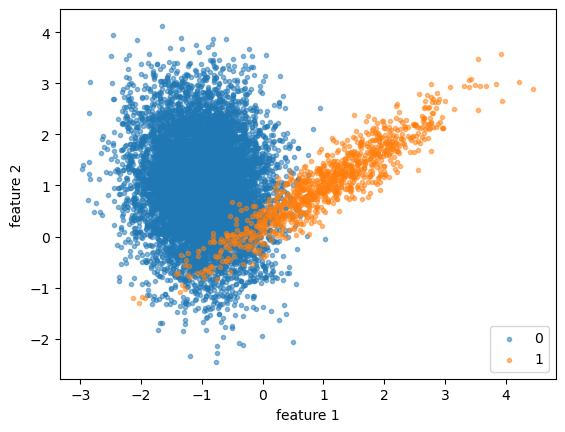

In [34]:
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# generate imbalanced dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=2)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), alpha=0.5, marker='.')

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='lower right')

In [7]:
help(make_classification)

Help on function make_classification in module sklearn.datasets._samples_generator:

make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
    Generate a random n-class classification problem.
    
    This initially creates clusters of points normally distributed (std=1)
    about vertices of an ``n_informative``-dimensional hypercube with sides of
    length ``2*class_sep`` and assigns an equal number of clusters to each
    class. It introduces interdependence between these features and adds
    various types of further noise to the data.
    
    Without shuffling, ``X`` horizontally stacks features in the following
    order: the primary ``n_informative`` features, followed by ``n_redundant``
    linear combinations of the informative features, followed by ``n_repeated``
    duplicates, dr

### Split the data.

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [36]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {'max_depth': np.arange(10)+1,
              'criterion': ['gini','entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, 
                           return_train_score=True, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'criterion': 'gini', 'max_depth': 3}
Best model: DecisionTreeClassifier(max_depth=3, random_state=0)
Test score: 0.97


### We got 97% accuracy! But let's have a look at the result (make this as a habit). 

### This is the true class.

Counter({0: 2256, 1: 244})


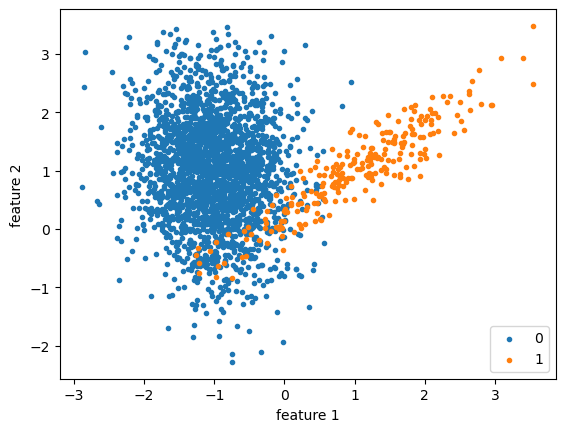

In [37]:
counter = Counter(y_test)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y_test == label)[0]
    plt.scatter(X_test[row_ix, 0], X_test[row_ix, 1], label=str(label), alpha=1, marker='.')

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='lower right')

### This is our best model. Are we good with it?

Counter({0: 2298, 1: 202})


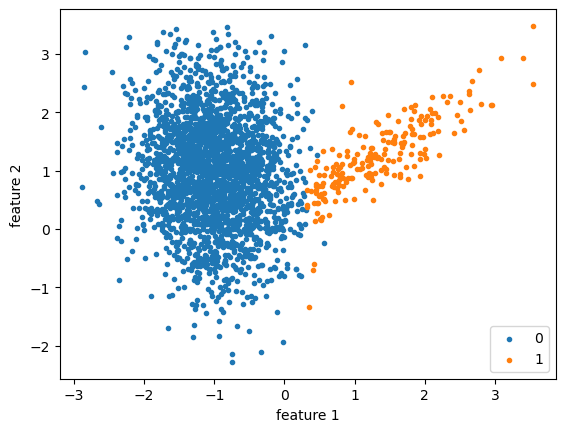

In [38]:
## ** operator takes a dictionary and unpack it into keaword arguments in a function.
model = DecisionTreeClassifier(**grid_search.best_params_, random_state=0)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

counter = Counter(prediction)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(prediction == label)[0]
    plt.scatter(X_test[row_ix, 0], X_test[row_ix, 1], label=str(label), alpha=1, marker='.')

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='lower right')

# Accuracy may not be the best in this case

### Although we got a pretty high accuracy, this may not necesarily the result we wanted.

### Let's check out different evaluation metric

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2256
           1       0.93      0.77      0.84       244

    accuracy                           0.97      2500
   macro avg       0.95      0.88      0.91      2500
weighted avg       0.97      0.97      0.97      2500



### TODO: I'd like to minimize false negatives. Let's use "recall" as the evaluation metric.

In [40]:
param_grid = {'max_depth': np.arange(10)+1,
              'criterion': ['gini','entropy']}

#change scoring parameter
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, 
                           return_train_score=True, verbose=1, scoring='recall')

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 8}
Best model: DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)
Test score: 0.84


### TODO: Make a plot showing your prediction. Is it any better?

Counter({0: 2273, 1: 227})


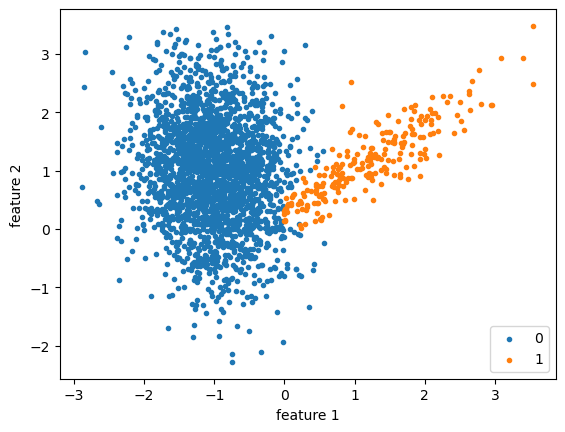

In [41]:
## ** operator takes a dictionary and unpack it into keaword arguments in a function.
model = DecisionTreeClassifier(**grid_search.best_params_, random_state=0)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

counter = Counter(prediction)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(prediction == label)[0]
    plt.scatter(X_test[row_ix, 0], X_test[row_ix, 1], label=str(label), alpha=1, marker='.')

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='lower right');

# Better than using "accuracy" but still not ~great~

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

# Recall score is slightly better -> good

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2256
           1       0.90      0.84      0.87       244

    accuracy                           0.97      2500
   macro avg       0.94      0.91      0.93      2500
weighted avg       0.97      0.97      0.97      2500

[CV 1/5] END criterion=gini, max_depth=1;, score=(train=0.600, test=0.600) total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1;, score=(train=0.600, test=0.600) total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1;, score=(train=0.599, test=0.601) total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2;, score=(train=0.665, test=0.664) total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2;, score=(train=0.665, test=0.662) total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=3;, score=(train=0.748, test=0.750) total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=3;, score=(train=0.749, test=0.748) total time=   0.2s
[CV 5/5] END cr